<img src='../2. Visualizacion/Imagenes/Diplomado.jpg' style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 120%;">

## Paso 1: Importar Librerías y Datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datos = pd.read_csv('C:/Users/Supermercado/Downloads/1. Limpieza/2. Visualizacion/Dataset/datosLimpios.csv')

datos.drop(['Unnamed: 0'], axis=1, inplace=True)

datos.head()

,Age,Gender,Temperature,Headache,Fever,Hospital,CovidDiagnosis
0,12.0,Masculino,36.0,SI,1.0,Moncaleano,positive
1,35.0,Femenino,38.0,NO,0.0,Medilaser,negative
2,65.0,Femenino,36.0,SI,1.0,Carmen Emilia,negative
3,78.0,Femenino,39.0,NO,1.0,Moncaleano,negative
4,41.0,Masculino,40.0,SI,0.0,Medilaser,positive


## Paso 2: Funciones para Graficar

In [2]:
##Datos numéricos

def diagHist(df, col, cruce):
    return sns.displot(data=df, x=col, hue=cruce, multiple="stack")

def diagHistDos(df, col, cruce, crucedos):
    return sns.displot(data=df, x=col, hue=cruce, col=crucedos, kind="kde")

def diagBar(df, varx, vary ):
  sns.barplot(data=df, x=varx, y=vary)

def diagBarDos(df, varx, vary, cruce):
  sns.barplot(data=df, x=varx, y=vary, hue=cruce)

def diagCount(df, varx, cruce):
  sns.countplot(data=df, x=varx, hue=cruce)

def diagCaja(df, varx, vary):
  sns.boxplot(data=df, x=varx, y=vary)

def diagCajaDos(df, varx, vary, cruce):
  sns.boxplot(data=df, x=varx, y=vary, hue=cruce)

def diagPuntos(df, varx, vary, cruce, tamanio):
    sns.scatterplot(
    data=df, x=varx, y=vary, hue=cruce, size=tamanio,
    sizes=(20, 200), legend="full"
  )

c:\Users\Supermercado\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


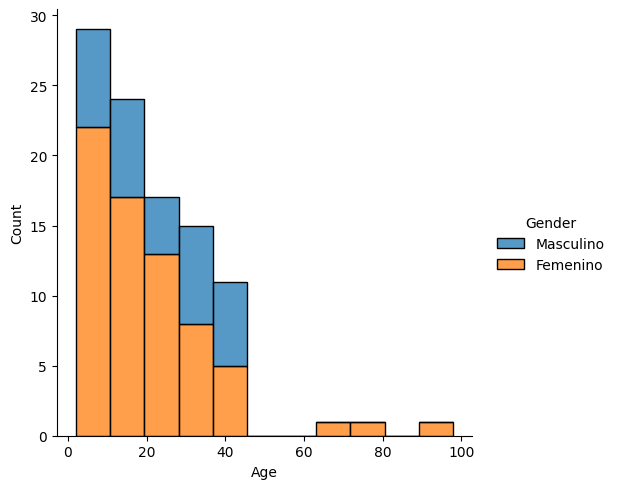

In [3]:
diagHist(datos, 'Age','Gender')

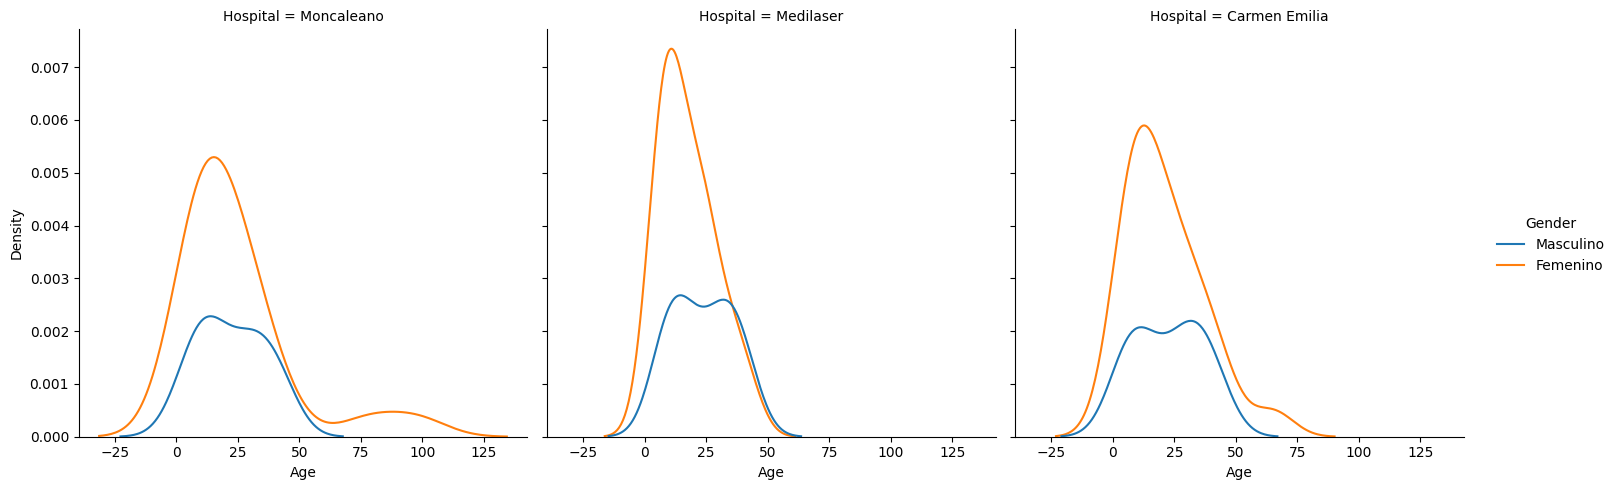

In [4]:
diagHistDos(datos, 'Age','Gender','Hospital')

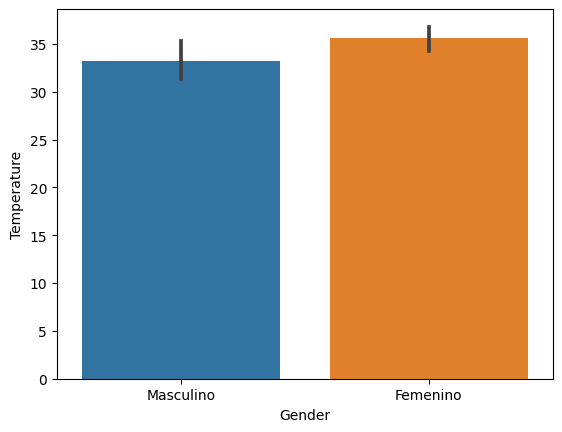

In [5]:
diagBar(datos, 'Gender','Temperature')

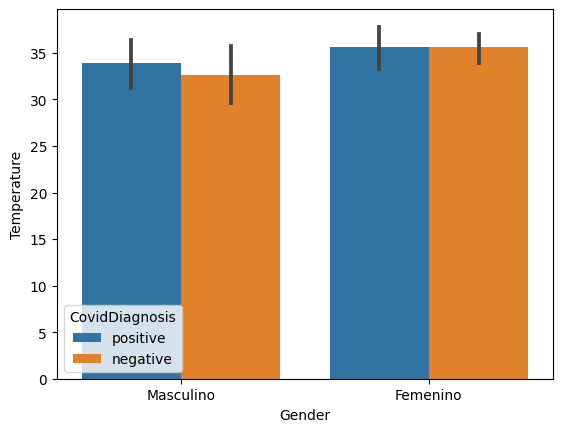

In [6]:
diagBarDos(datos, 'Gender','Temperature', 'CovidDiagnosis')

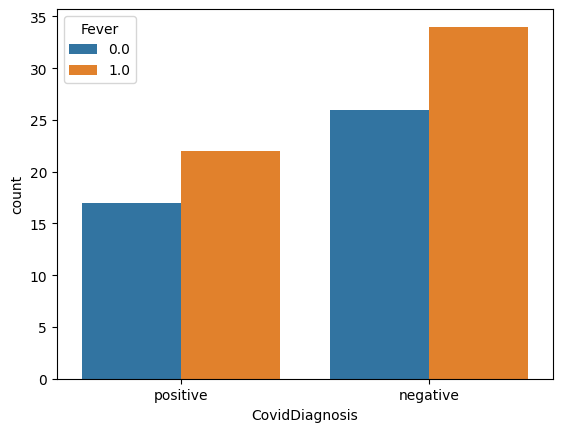

In [7]:
diagCount(datos, 'CovidDiagnosis','Fever')

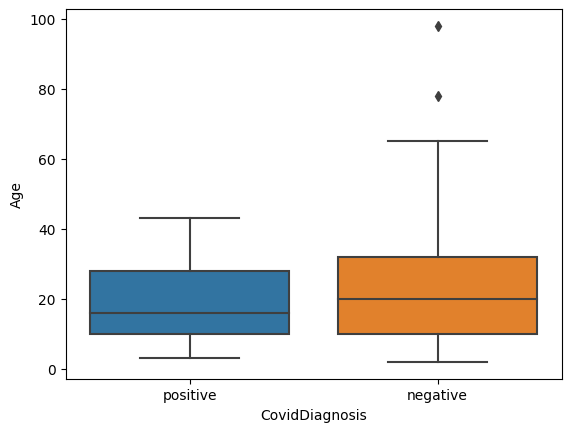

In [8]:
diagCaja(datos,'CovidDiagnosis', 'Age')

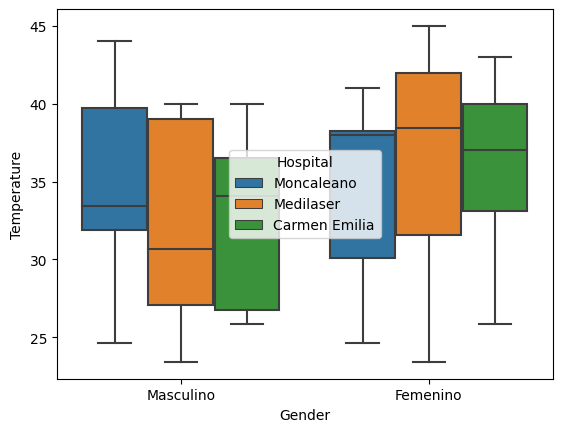

In [9]:
diagCajaDos(datos, 'Gender', 'Temperature','Hospital')

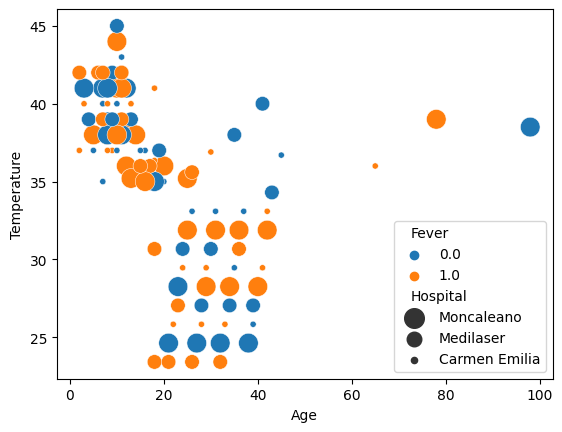

In [10]:
diagPuntos(datos, 'Age', 'Temperature', 'Fever','Hospital')

In [37]:
##Graficas complejas
colors = ['#2ECC71','#3498DB', '#fb8c00']
vectdos = ['Moncaleano','Medilaser','Carmen Emilia']

def drawChartDos(column1, column2, texto1, texto2, explod, sizes):
    f, ax = plt.subplots(1,2, figsize=(sizes[0],sizes[1]))
    ##Grafica Matplotlib
    datos[column2].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, 
                                             explode= explod, fontsize=10, 
                                             colors=colors)
    ax[0].set_title(texto1, fontsize=14)
    ax[0].set_xlabel('', fontsize=12)
    ax[0].set_ylabel('', fontsize=12)
    
    ##Grafica seaborn '#fb8c00','#0288d1','#00e676','#ff5722','#ffeb3b','#e040fb'
    
    plot = sns.countplot(data=datos, x=column1, hue=column2, ax=ax[1], palette=colors)
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=10, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=14)
    ax[1].set_xlabel('', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)
    ax[1].tick_params(labelsize=14)
    #plt.legend(labels = vectdos, fontsize=8)
    plt.show() 

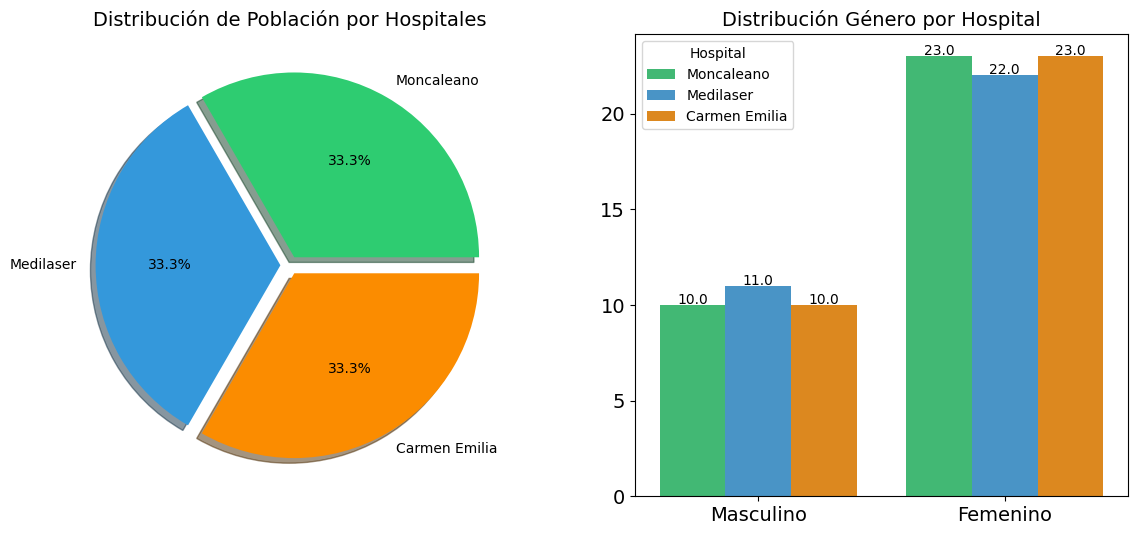

In [38]:
drawChartDos('Gender','Hospital','Distribución de Población por Hospitales','Distribución Género por Hospital',(0.05, 0.05, 0.05), sizes=[14,6])

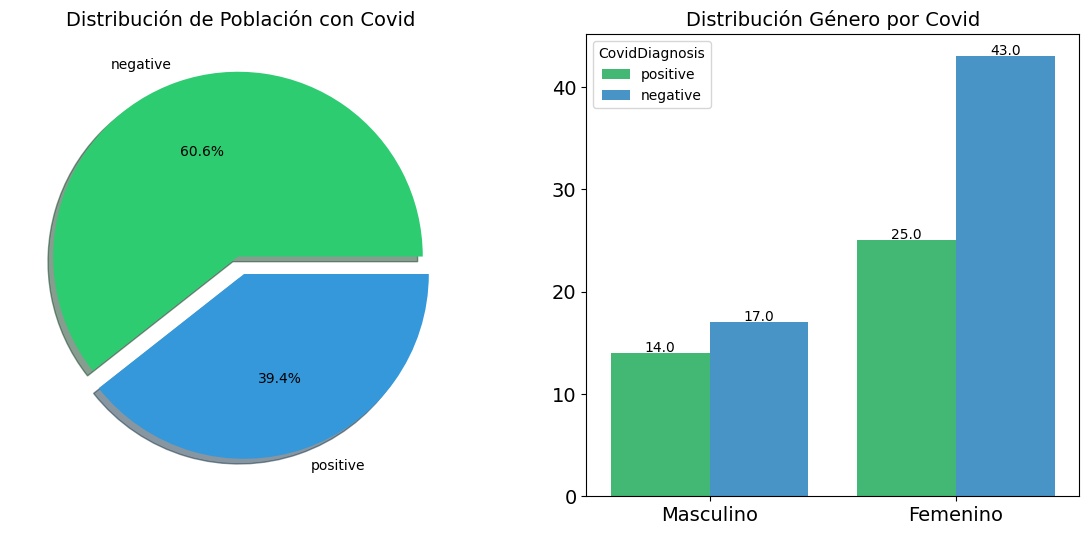

In [39]:
drawChartDos('Gender','CovidDiagnosis','Distribución de Población con Covid','Distribución Género por Covid',(0.05, 0.05), sizes=[14,6])